In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix
)

In [2]:
df_data = pd.read_csv('data.csv')

In [3]:
df_data

,x,y
0,54,1
1,56,2
2,102,11
3,3,2
4,24,33
...,...,...
95,9,92
96,48,84
97,64,24
98,32,32


In [4]:
x = np.array([df_data['x']])
y = np.array([df_data['y']])

In [5]:
data_points = df_data[['x', 'y']].values

In [6]:
cosine_sim = cosine_similarity(data_points)
cosine_sim

array([[1.        , 0.99985238, 0.99604997, ..., 0.94266984, 0.72007789,
        0.68925746],
       [0.99985238, 1.        , 0.99742859, ..., 0.94826473, 0.73189397,
        0.70160425],
       [0.99604997, 0.99742859, 1.        , ..., 0.96857935, 0.77884743,
        0.75086792],
       ...,
       [0.94266984, 0.94826473, 0.96857935, ..., 1.        , 0.91036648,
        0.89153278],
       [0.72007789, 0.73189397, 0.77884743, ..., 0.91036648, 1.        ,
        0.99905616],
       [0.68925746, 0.70160425, 0.75086792, ..., 0.89153278, 0.99905616,
        1.        ]])

In [7]:
euclidean_dist = euclidean_distances(data_points)
euclidean_dist

array([[ 0.        ,  2.23606798, 49.03060269, ..., 25.07987241,
        38.01315562, 44.38468204],
       [ 2.23606798,  0.        , 46.87216658, ..., 23.40939982,
        38.41874542, 46.09772229],
       [49.03060269, 46.87216658,  0.        , ..., 40.16217126,
        73.08214556, 91.00549434],
       ...,
       [25.07987241, 23.40939982, 40.16217126, ...,  0.        ,
        32.984845  , 54.34151268],
       [38.01315562, 38.41874542, 73.08214556, ..., 32.984845  ,
         0.        , 29.        ],
       [44.38468204, 46.09772229, 91.00549434, ..., 54.34151268,
        29.        ,  0.        ]])

In [8]:
def K_means(X, n_clusters, max_iter, similarity_m):
    centers = X[np.random.choice(range(len(X)), size = n_clusters, replace=False)]
    prev_centroids = None
    iterr = 0
    labels = np.zeros(len(X))
    while iterr < max_iter and (prev_centroids == None or not np.allclose(centers, prev_centers)):
        
        if similarity_m == "cosine similarity":
            similarity_matrix = cosine_similarity(X, centers)
            labels = np.argmax(similarity_matrix, axis=1)
        else:
            similarity_matrix = euclidean_distances(X, centers)
            labels = np.argmin(similarity_matrix, axis=1)

        prev_centers = centers
        new_centers = []
        for i in range(n_clusters):
            cluster_points = X[labels == i]
            center = np.mean(cluster_points, axis=0)
            new_centers.append(center)
            
        centers = np.array(new_centers)
        iterr += 1
        
    return centers, labels

In [9]:
#initializetion
n_clusters = 4
max_iter = 200

In [10]:
centers1, labels1 = K_means(data_points, n_clusters, max_iter, "Cosine Similarity")
centers2, labels2 = K_means(data_points, n_clusters, max_iter, "Euclidean Distance")

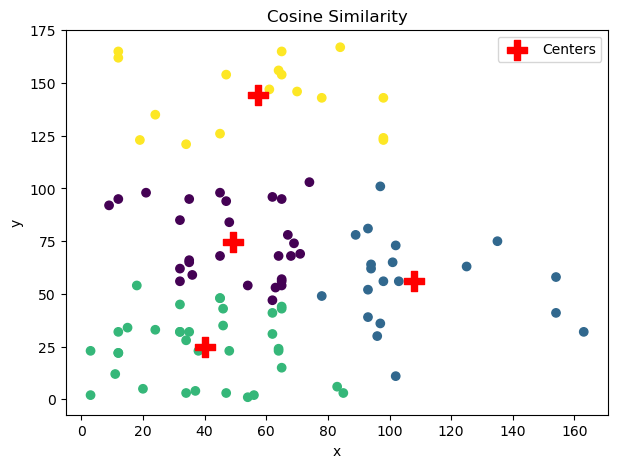

In [11]:
# Plot using cosine similarity
plt.figure(figsize=(7, 5))
plt.scatter(data_points[:, 0], data_points[:, 1], c=labels1)
plt.scatter(centers1[:, 0], centers1[:, 1], s = 200, c='red', marker='P',label='Centers')
plt.title('Cosine Similarity')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

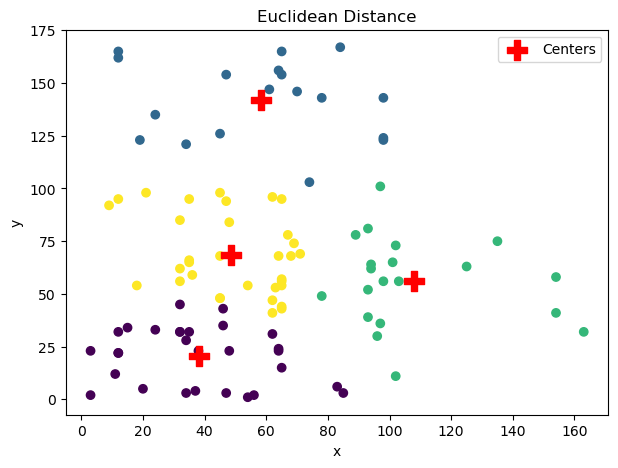

In [12]:
# Plot using Euclidean Distance
plt.figure(figsize=(7, 5))
plt.scatter(data_points[:, 0], data_points[:, 1], c=labels2)
plt.scatter(centers2[:, 0], centers2[:, 1], s = 200, c='red', marker='P',label='Centers')
plt.title('Euclidean Distance')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()